### In an experiment, typically what you do is to shine a source of energy (light, sound etc) to scatter off of a detector and then observe the resulting radiation that is left over after the scatterer has absorbed and reemitted the radiation.

### This primitive is at the heart of several theoretical analysis such as Rayleigh and Rutherford scattering, absorption spectroscopy and resonance measurements.

### Often times, the job of a numerical simulation of such an experiment is to propose what you would see if you observed either the light that survives the scatterer and comes through on the other side (whats called the transmission spectrum) or the difference between this and what you sent in (the absorption spectrum).

### Lets learn how to simulate such experiments. Firstly, note that just like detectors placed at a particular place in space are picking out a momentum direction, detectors which are sensitive to a frequency window are picking out a frequency spectrum. Such transformations from the natural basis of description of the experiment (space, where I placed the scatterer and the plane wave I shone on it. Another example is a time dependent sine wave I sent to the scatterer) and the basis you measure in (momentum for space, frequency for time) is actually achieved via FOURIER transformations.

### Today, lets focus on time and not as much on space. Hence we will take time series data and Fourier transform FT it. Let us Fourier transform a time series data.

### BELOW, you can see a time series which is the sum of two sine waves (remember that the Fourier transform will have both positive and negative frequency components) at two different frequencies. Assuming this is the "signal", presented below is a code snippet to FT the signal and get the fourier spectrum.

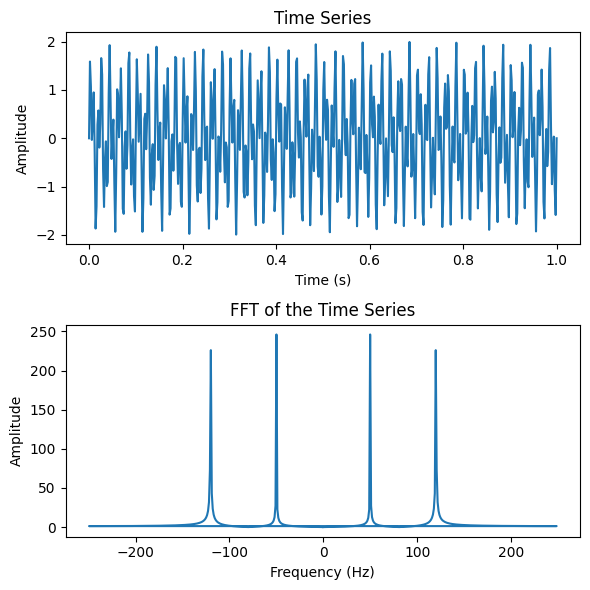

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Create a time series
t = np.linspace(0, 1, 500)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)

# Compute the FFT
fft_signal = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), d=t[1] - t[0])

# Plot the time series
plt.figure(figsize=(6, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Series')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the FFT
plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.abs(fft_signal))
plt.title('FFT of the Time Series')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

The output of the absorbed radiation is usually measured as intensity (which in analogy to electric circuits can be called the POWER) as a function of frequency. This is to say, an experimentalist will place a detector which can scan in frequency space and scan the intensity of radiation (think photon flux per second) as a function of frequency. A typical spectrum you will see is presented below.


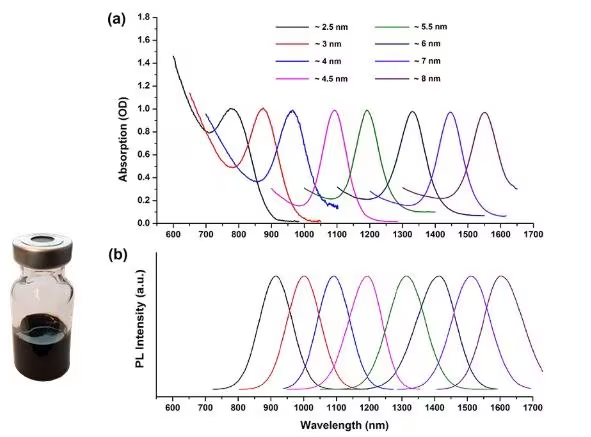

### In the figure above, taken from a company called Sigma-Aldrich, the PL Intensity stands for photo luminiscence intensity. Note that instead of plotting Intensity as a function of frequency $\nu=\frac{\omega}{2\pi}$, the plot presents it in terms of wavelength $\lambda$. The conversion is of course $\lambda=\frac{c}{\nu}$, where $c$ is the speed of light. 

# TASKS TO DO

Today, lets ask the question as to what we will see if we take a simple damped driven harmonic oscillator and think of it as a "spectroscopy experiment". Your task is to generate the plot of what the experimentalist will see when they perform the experiment.

## There is a relationship between the power spectrum $I(\omega)$ and the time dependance of the underlying system. Say the harmonic oscillator is oscillating as $x(t)$, then clearly the intensity at any given frequency is $I(\omega)=\vert \tilde x(\omega)\vert^2$, where $\tilde x(\omega)$ is the Fourier transform of $x(t)$.

This makes sense, since $x(t)$ is oscillating with several frequencies present, then $\tilde x(\omega)$ pulls out the frequency contribution and then its easy to see that the modulus squared (since FT are complexes) is the intensity. 

### Another important way to think of the power spectrum is that its the Fourier transform of the convolution of $x(t)$ namely $I(\omega)=\mathcal{F}(\alpha(t))$, where $\mathcal F$ is FT and $\alpha(t)=\int_{-\infty}^{\infty}ds x(s)x(s-t)$ is the so-called AUTO CORRELATION FUNCTION. This follows from Fourier tranform rules around convolution.

## [1] Consider the damped driven harmonic oscillator whose evolution equation is given by $\ddot{x}(t)+ \omega_0^2 x(t)+\gamma \dot{x}(t)=A\sin(\omega_d t)$ with the RHS representing the drive amplitude and frequency. Write a program that takes $\omega_0,\gamma,\omega_d,A$ and outputs $x(t)$.

## [2] Take x(t), Fourier transform it, and plot the power spectrum.

## [3] Take $x(t)$ and compute the auto-correlation function $\alpha(t)$. Fourier transform this to get back the previous spectrum. 

# NOTE THAT THE TAs should be able to change the parameters of the program $\omega_0,\gamma,\omega_d,A$ and your code should replot the power spectra immediately. 